<a href="https://colab.research.google.com/github/sourajroy-afk/BA-using-PYTHON-/blob/main/notebooks/01_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Opening the dataset using basic Python
file_path = "/content/supplier_data.csv"  # update path after uploading to colab

data = []

with open(file_path, "r") as file:
    for line in file:
        # remove newline + split by comma
        row = line.strip().split(",")
        data.append(row)

# Print first 5 rows
for row in data[:5]:
    print(row)

# Print number of rows
print("\nTotal rows:", len(data))

# Print column names
print("\nColumn Names:", data[0])





['\ufeffSupplier_ID', 'On_Time_Delivery', 'Lead_Time_Days', 'Lead_Time_Variance', 'Defect_Rate', 'Order_Fill_Rate', 'Cost_Variance', 'Payment_Delay_Days', 'Risk_Level']
['S001', '92', '7', '1.2', '1.5', '96', '2', '5', 'Low']
['S002', '85', '10', '3.5', '2.8', '92', '5', '12', 'Medium']
['S003', '78', '14', '4.2', '3.5', '88', '6', '18', 'Medium']
['S004', '60', '18', '5.1', '5.8', '75', '8', '25', 'High']

Total rows: 21

Column Names: ['\ufeffSupplier_ID', 'On_Time_Delivery', 'Lead_Time_Days', 'Lead_Time_Variance', 'Defect_Rate', 'Order_Fill_Rate', 'Cost_Variance', 'Payment_Delay_Days', 'Risk_Level']


In [6]:
clean_data = []

# Skip the header, process rows 1 onwards
header = data[0]

for row in data[1:]:
    # Convert values to correct types
    try:
        cleaned_row = [
            row[0],                    # Supplier_ID (string)
            int(row[1]),               # On_Time_Delivery
            int(row[2]),               # Lead_Time_Days
            float(row[3]),             # Lead_Time_Variance
            float(row[4]),             # Defect_Rate
            int(row[5]),               # Order_Fill_Rate
            float(row[6]),             # Cost_Variance
            int(row[7]),               # Payment_Delay_Days
            row[8]                     # Risk_Level
        ]

        clean_data.append(cleaned_row)

    except:
        print("Skipping bad row:", row)

print("Cleaning complete.")
print("Total valid rows:", len(clean_data))

print("Total suppliers:", len(clean_data))



Cleaning complete.
Total valid rows: 20
Total suppliers: 20


In [10]:
## 3. Exploratory Data Analysis (Basic Python)

# Average On-Time Delivery
on_time = [row[1] for row in clean_data]

print("Average On-Time Delivery:", sum(on_time)/len(on_time))
print("Minimum On-Time Delivery:", min(on_time))
print("Maximum On-Time Delivery:", max(on_time))

# Supplier count by Risk Level
risk_counts = {"Low": 0, "Medium": 0, "High": 0}

for row in clean_data:
    risk_counts[row[8]] += 1

print("Supplier count by risk level:")
print(risk_counts)


Average On-Time Delivery: 76.3
Minimum On-Time Delivery: 52
Maximum On-Time Delivery: 97
Supplier count by risk level:
{'Low': 6, 'Medium': 7, 'High': 7}


In [18]:
## 4. Exploratory Data Analysis (Using Pandas)

import pandas as pd

df = pd.DataFrame(clean_data, columns=header)
df.head()

df.describe()
df['Risk_Level'].value_counts()


,count
Risk_Level,
Medium,7
High,7
Low,6


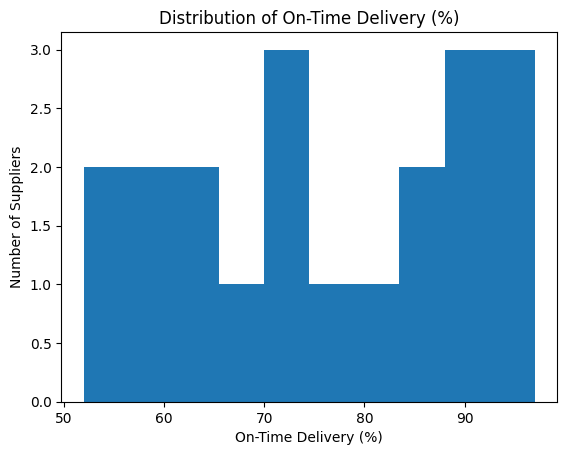

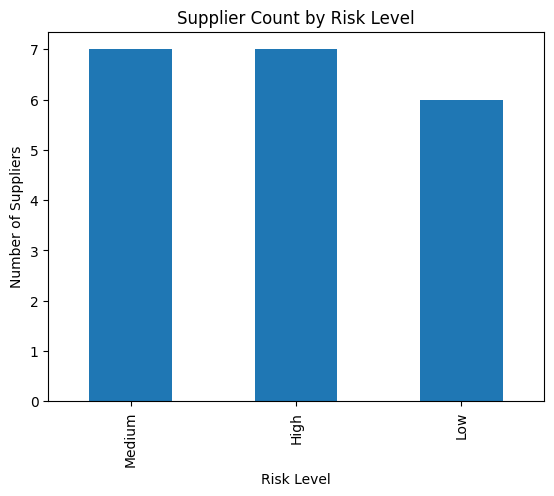

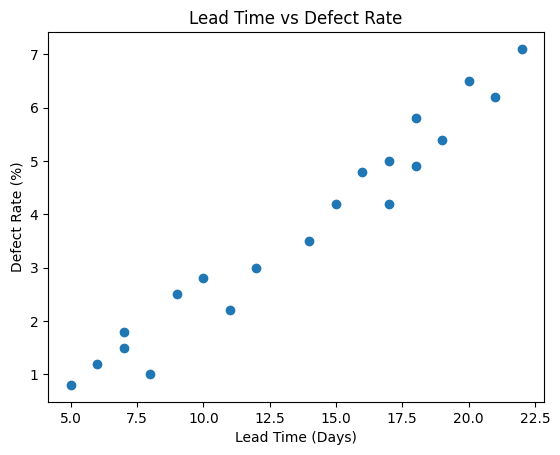

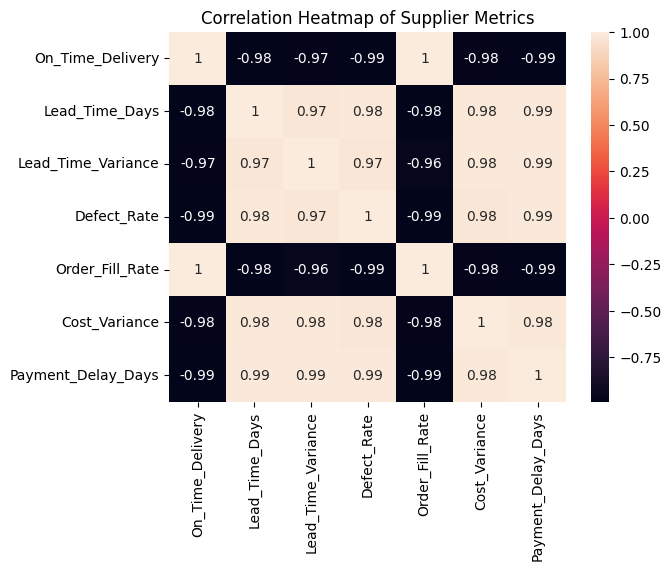

In [23]:
## 5. Visual Exploratory Data Analysis
## This section visualizes key supplier performance metrics to understand risk patterns.

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure()
plt.hist(df['On_Time_Delivery'], bins=10)
plt.title("Distribution of On-Time Delivery (%)")
plt.xlabel("On-Time Delivery (%)")
plt.ylabel("Number of Suppliers")
plt.show()


df['Risk_Level'].value_counts().plot(kind='bar')
plt.title("Supplier Count by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Suppliers")
plt.show()


plt.figure()
plt.scatter(df['Lead_Time_Days'], df['Defect_Rate'])
plt.title("Lead Time vs Defect Rate")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Defect Rate (%)")
plt.show()

plt.figure()
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True)
plt.title("Correlation Heatmap of Supplier Metrics")
plt.show()



**Key Business Insights and Observations:**

1. The average on-time delivery percentage across suppliers is relatively high; however, a few suppliers show significantly lower performance, indicating potential delivery risk.

2. Suppliers categorized under High Risk generally exhibit higher lead time, higher defect rates, and increased payment delays compared to Low Risk suppliers.

3. The distribution of risk levels shows that a considerable number of suppliers fall under Medium and High Risk categories, highlighting the need for proactive monitoring.

4. The scatter plot between lead time and defect rate indicates that suppliers with longer lead times tend to have higher defect rates, suggesting operational inefficiencies.

5. Correlation analysis reveals a positive relationship between lead time variance, defect rate, and payment delay, which are key indicators of supplier risk.

6. On-time delivery and order fill rate show a negative correlation with risk-related variables, indicating that reliable suppliers consistently perform better across multiple metrics.

7. These insights suggest that supplier risk is multi-dimensional and cannot be assessed using a single performance metric.



 **Managerial Implications**

1. Procurement managers should prioritize regular performance reviews for suppliers identified as High Risk to prevent supply chain disruptions.

2. Suppliers with high lead time variance and defect rates should be considered for corrective action plans or alternative sourcing strategies.

3. Improving payment cycle efficiency may help reduce supplier stress and enhance long-term supplier relationships.

4. Risk categorization can assist decision-makers in allocating audit and development resources more effectively.

5. Data-driven supplier evaluation enables proactive risk mitigation rather than reactive problem-solving.
